### Detecting Outliers Using Z-Score

**Definition:**

A **Z-Score** quantifies how many standard deviations a data point is from the mean of a dataset. It helps in identifying outliers by indicating which data points deviate significantly from the mean. Typically, a data point with a Z-Score greater than 3 or less than -3 is considered an outlier. :contentReference[oaicite:0]{index=0}

**Formula:**

The Z-Score for a data point \( X \) is calculated as:

$
Z = \frac{X - \mu}{\sigma}
$

Where:
- $( X $) = Individual data point
- $( \mu $) = Mean of the dataset
- $( \sigma $) = Standard deviation of the dataset

**Example:**

Consider a dataset of exam scores: [85, 87, 89, 90, 92, 95, 96, 150]. The score of 150 appears to be unusually high. To determine if it's an outlier:

1. **Calculate the mean ($( \mu $)) and standard deviation ($( \sigma $)) of the dataset:**

   - Mean ($( \mu $)) = 98
   - Standard deviation ($( \sigma $)) ≈ 20.34

2. **Compute the Z-Score for 150:**

   $
   Z = \frac{150 - 98}{20.34} ≈ 2.55
  $

   A Z-Score of 2.55 suggests that the score of 150 is 2.55 standard deviations above the mean. Depending on the chosen threshold (commonly 2 or 3), this may be considered an outlier. :contentReference[oaicite:1]{index=1}

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
dataset = pd.read_excel("Financial Sample.xlsx")
dataset.head(2)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014


In [26]:
dataset.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,NaN,3.377321,0.433322


In [27]:
# check the null value and fillna

dataset.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
 Sales                  0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

In [28]:
# im using Units Sold to use to find outlier
dataset["Units Sold"].fillna(dataset["Units Sold"].mean())

0      1618.5
1      1321.0
2      2178.0
3       888.0
4      2470.0
        ...  
695    2475.0
696     546.0
697    1368.0
698     723.0
699    1806.0
Name: Units Sold, Length: 700, dtype: float64

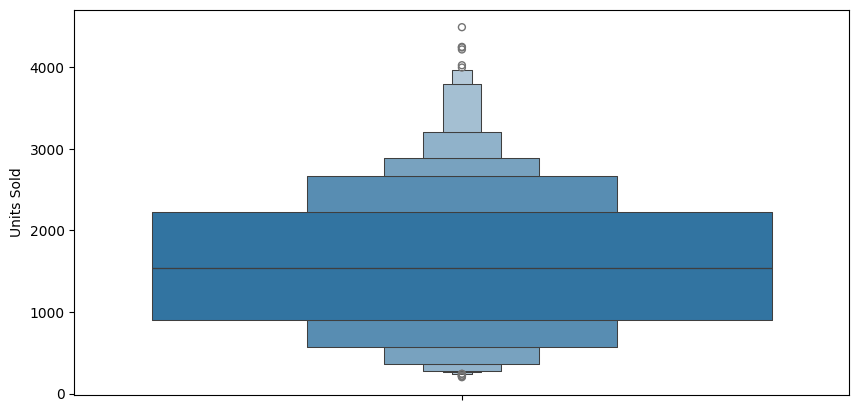

In [29]:
# now useing the boxplot to find the outlier

plt.figure(figsize=(10,5))
sns.boxenplot(dataset["Units Sold"])
plt.show()

C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_7688\3084274425.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Units Sold"])


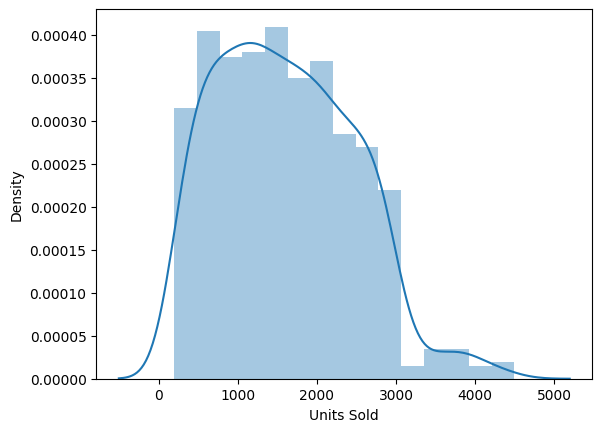

In [30]:
# now using the distplot to show the outlier
sns.distplot(dataset["Units Sold"])
plt.show()

In [31]:
# now removing the outlier using min and max
min_range = dataset["Units Sold"].mean() - 3* (dataset["Units Sold"].std())
max_range = dataset["Units Sold"].mean() + 3* (dataset["Units Sold"].std())
min_range, max_range

(np.float64(-993.9892914568718), np.float64(4210.577862885443))

In [40]:
new_dataset = dataset[dataset["Units Sold"] <= max_range]
new_dataset.shape

(696, 17)

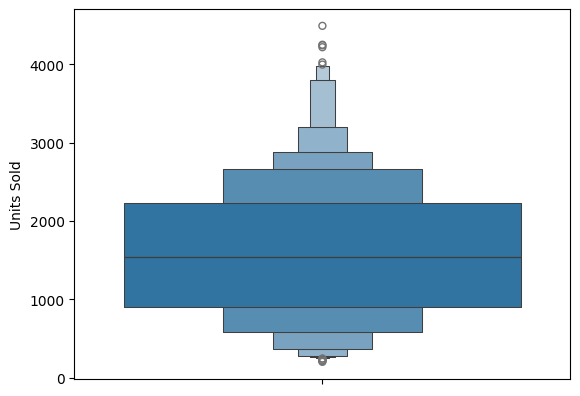

In [33]:
sns.boxenplot(dataset["Units Sold"])
plt.show()

In [34]:
# now using z-score to remove the outlier
z_score = (dataset["Units Sold"] - dataset["Units Sold"].mean())/dataset["Units Sold"].std()
z_score

0      0.011765
1     -0.331203
2      0.656776
3     -0.830379
4      0.993403
         ...   
695    0.999167
696   -1.224649
697   -0.277019
698   -1.020597
699    0.227922
Name: Units Sold, Length: 700, dtype: float64

In [35]:
# adding new column in dataset for z-score
dataset["z_score"] = z_score
dataset.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,z_score
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014,0.011765
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014,-0.331203
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014,0.656776


In [42]:
# now removing the outlier by only taking the data which is less then 3 of z-score
dataset[dataset["z_score"]<3]
dataset.shape

(700, 17)